In [9]:
import matplotlib.pyplot as plt
from typing import List

In [10]:
import itertools
import os

In [11]:
import numpy as np
import pandas as pd

In [27]:
def plot_throughput(throughput_list: List[List[float]], labels: List[str], param, ax: plt.Axes):
    ax.set_title("Throughput (cache_ratio={} delay_epoch={} cache_min_neighbor={})".format(*param))
    ax.set_xlabel("Epoch")
    ax.set_ylabel("Throughput (samples/s)")
    for througput, label in zip(throughput_list, labels):
        ax.plot(througput, label=label)
    delay_epoch = param[-2]
    ax.axvline(x=delay_epoch, color='r', linestyle='--')
    ax.set_xlim((0, 9))
    ax.set_xticks(range(0, 10))
    ax.grid(axis='y')
    ax.legend()


def plot_vals(val_list: List[List[float]], labels: List[str], param, ax: plt.Axes):
    ax.set_title("Val AP (cache_ratio={} delay_epoch={} cache_min_neighbor={})".format(*param))
    ax.set_xlabel("Epoch")
    ax.set_ylabel("Val AP")
    for val, label in zip(val_list, labels):
        ax.plot(val, label=label)
    delay_epoch = param[-2]
    ax.axvline(x=delay_epoch, color='r', linestyle='--')
    ax.set_xlim((0, 9))
    ax.set_xticks(range(0, 10))
    ax.set_ylim((0.8, 1))
    ax.grid(axis='y')
    ax.legend()


(0.2, 0, 10) 0.25379187176333207
(0.2, 2, 10) 0.25405112386245265


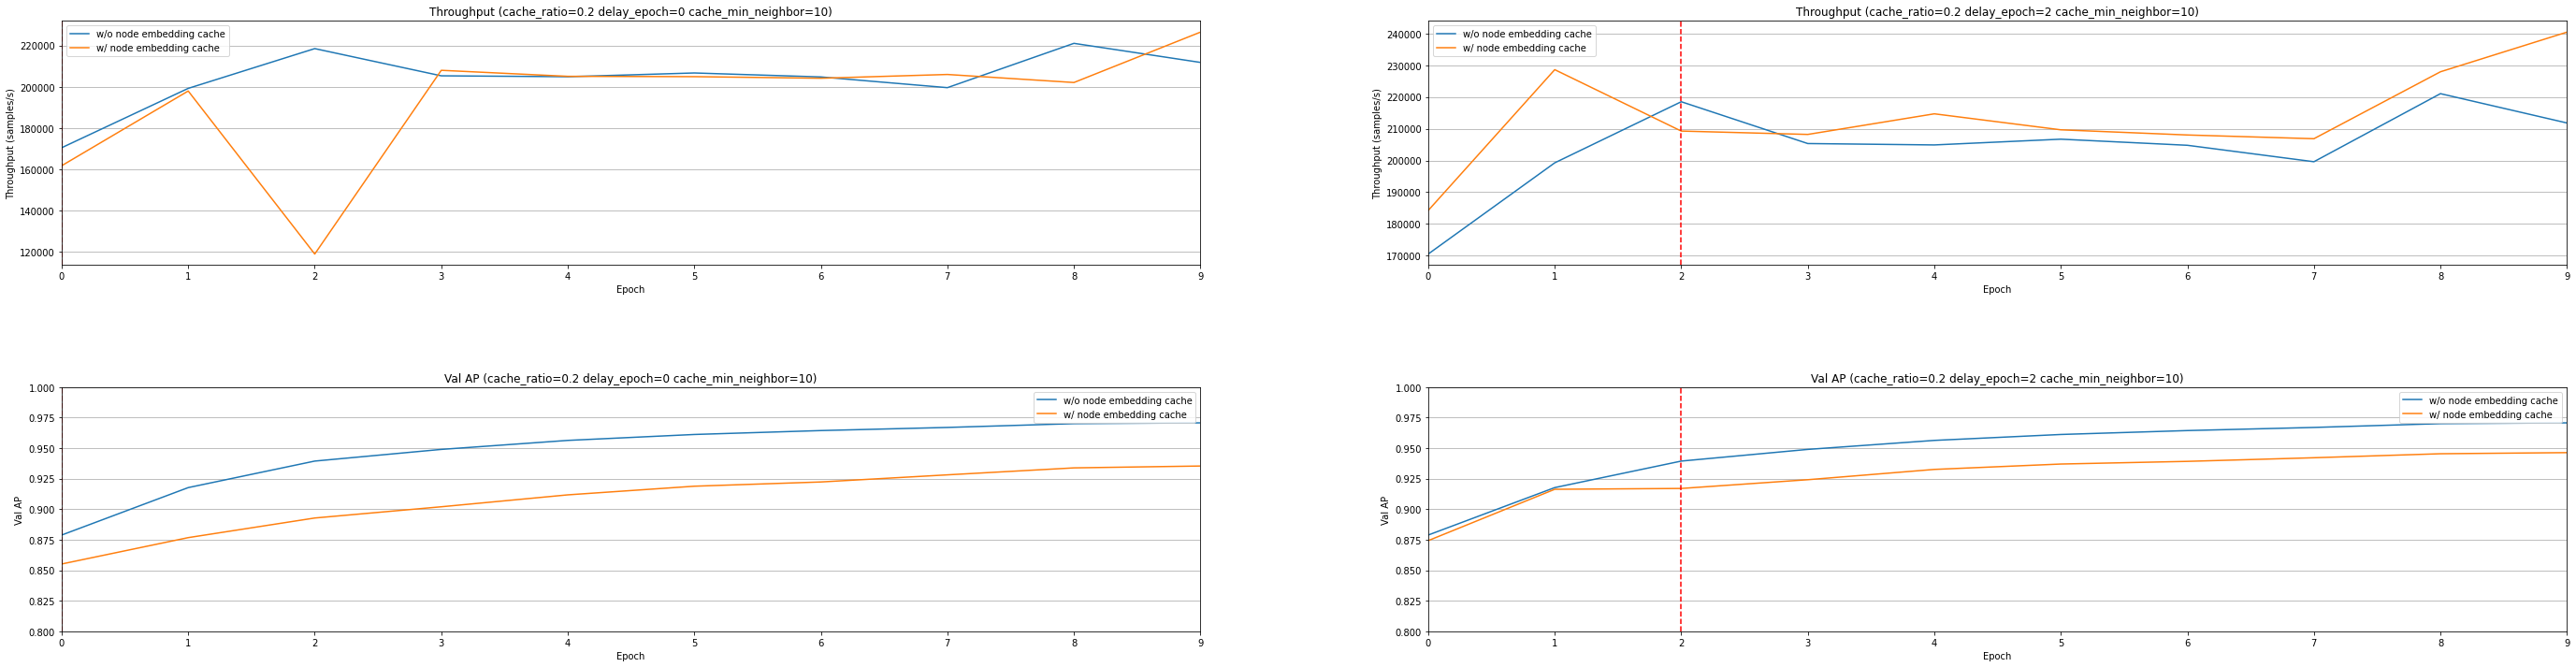

In [28]:
cache_ratio = [0.2]
delay_epoch = [0, 2]
cache_min_neighbor = [10]
param_space = list(itertools.product(cache_ratio, delay_epoch, cache_min_neighbor))

ncols = 2
nrows = len(param_space) // ncols * 2
if nrows == 0:
    nrows = 1
fig, axes = plt.subplots(nrows=nrows, ncols=ncols)
fig.set_size_inches(48, nrows * 6)
fig.subplots_adjust(hspace=0.5)

model = 'TGN'
dataset = 'REDDIT'
i = 0
out_dir = "tmp_res/yczhong_delay_tgn/"


postfix = '||model{}||dataset{}||cache_ratio{}||delay_epoch{}||cache_min_neighbor{}.npy'

file = out_dir+"throughput" + postfix.format(model, dataset, 0.0, 0, 0)
no_cache_throughput = np.load(file)
file = out_dir+"val_ap" + postfix.format(model, dataset, 0.0, 0, 0)
no_cache_vals = np.load(file)

for param in param_space:
    file = out_dir+"throughput" + postfix.format(model, dataset,*param)
    throughput = np.load(file)
    file = out_dir+"val_ap" + postfix.format(model, dataset, *param)
    vals = np.load(file)
    node_embedding_hit_rate = np.load(out_dir+"node_embed_cache_hit_rate" + postfix.format(model, dataset, *param))
    print(param, node_embedding_hit_rate)
    labels = ["w/o node embedding cache", "w/ node embedding cache"]
    plot_throughput([no_cache_throughput, throughput], labels, param, axes[i//ncols][i%ncols])
    plot_vals([no_cache_vals, vals], labels, param, axes[i//ncols+nrows//2][i%ncols])
    i += 1
plt.savefig(out_dir+"{}_{}_lru_result.png".format(model, dataset), dpi=400, bbox_inches='tight')

(0.2, 0, 0) 0.5438716726894449
(0.2, 0, 0) 0.5740990086669938
(0.2, 0, 3) 0.151172370425291
(0.2, 0, 3) 0.15617754342879844
(0.2, 0, 5) 0.14885538888168942
(0.2, 0, 5) 0.1531546115502794
(0.2, 2, 0) 0.543654519845426
(0.2, 2, 0) 0.5742580050547432
(0.2, 2, 3) 0.1512458228262232
(0.2, 2, 3) 0.15599349639093602
(0.2, 2, 5) 0.14882254863012778
(0.2, 2, 5) 0.152875442856546
(0.4, 0, 0) 0.747047493200032
(0.4, 0, 0) 0.6805859763096975
(0.4, 0, 3) 0.20041497331353358
(0.4, 0, 3) 0.1992939080359653
(0.4, 0, 5) 0.1981251137458848
(0.4, 0, 5) 0.19642499782245232
(0.4, 2, 0) 0.7451196376560665
(0.4, 2, 0) 0.6784891572288564
(0.4, 2, 3) 0.200412636433099
(0.4, 2, 3) 0.19927615128539047
(0.4, 2, 5) 0.1980528297851699
(0.4, 2, 5) 0.1961994357495969


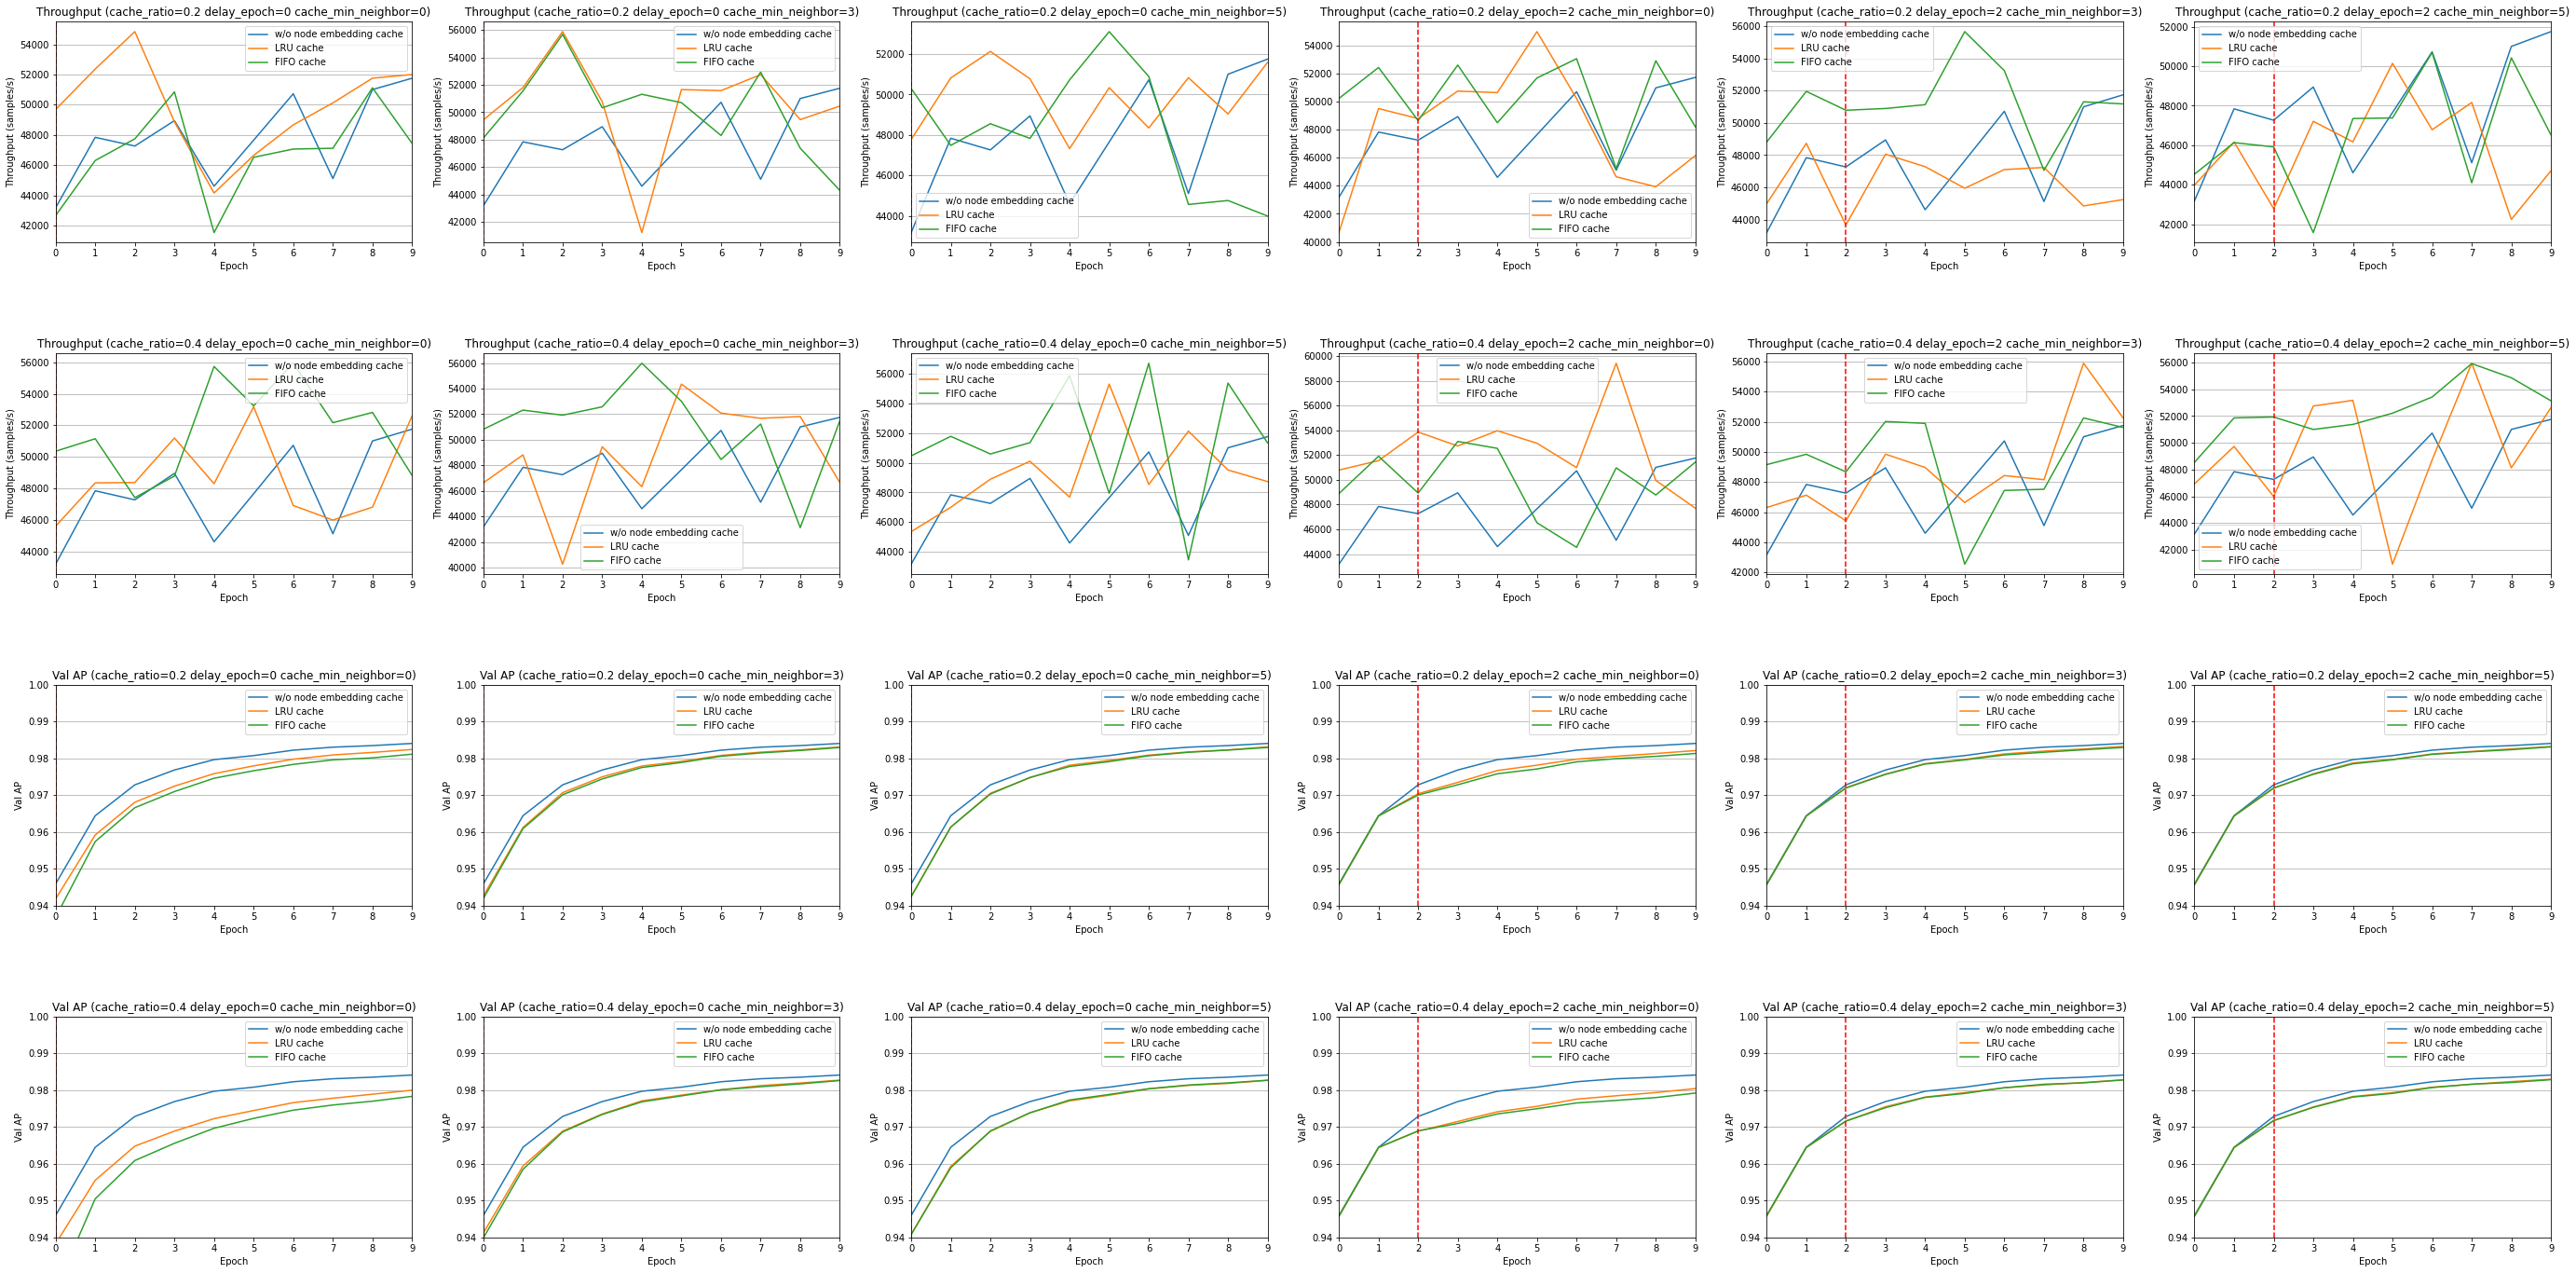

In [21]:
cache_ratio = [0.2, 0.4]
delay_epoch = [0, 2]
cache_min_neighbor = [0, 3, 5]
param_space = list(itertools.product(cache_ratio, delay_epoch, cache_min_neighbor))

ncols = 6
nrows = len(param_space) // ncols * 2
if nrows == 0:
    nrows = 1
fig, axes = plt.subplots(nrows=nrows, ncols=ncols)
fig.set_size_inches(48, nrows * 6)
fig.subplots_adjust(hspace=0.5)

model = 'TGN'
dataset = 'REDDIT'
i = 0
fifo_out_dir = "tmp_res/yczhong_delay_fifo/"
lru_out_dur = "tmp_res/yczhong_delay_lru/"

postfix = '||model{}||dataset{}||cache_ratio{}||delay_epoch{}||cache_min_neighbor{}.npy'

file = lru_out_dur + "throughput" + postfix.format(model, dataset, 0.0, 0, 0)
no_cache_throughput = np.load(file)
file = lru_out_dur+"val_ap" + postfix.format(model, dataset, 0.0, 0, 0)
no_cache_vals = np.load(file)

for param in param_space:
    throughput_list = [no_cache_throughput]
    val_list = [no_cache_vals]
    for cache_type in ["lru", "fifo"]:
        subdir = "tmp_res/yczhong_delay_{}/".format(cache_type)
        file = subdir+"throughput" + postfix.format(model, dataset,*param)
        throughput = np.load(file)
        file = subdir+"val_ap" + postfix.format(model, dataset, *param)
        vals = np.load(file)
        node_embedding_hit_rate = np.load(subdir+"node_embed_cache_hit_rate" + postfix.format(model, dataset, *param))
        print(param, node_embedding_hit_rate)
        throughput_list.append(throughput)
        val_list.append(vals)
    labels = ["w/o node embedding cache", "LRU cache", "FIFO cache"]
    plot_throughput(throughput_list,labels, param, axes[i//ncols][i%ncols])
    plot_vals(val_list, labels, param, axes[i//ncols+nrows//2][i%ncols])
    i += 1
plt.savefig(out_dir+"{}_{}_fifo_result.png".format(model, dataset), dpi=400, bbox_inches='tight')

(0.2, 0, 10) 0.1432226572596607


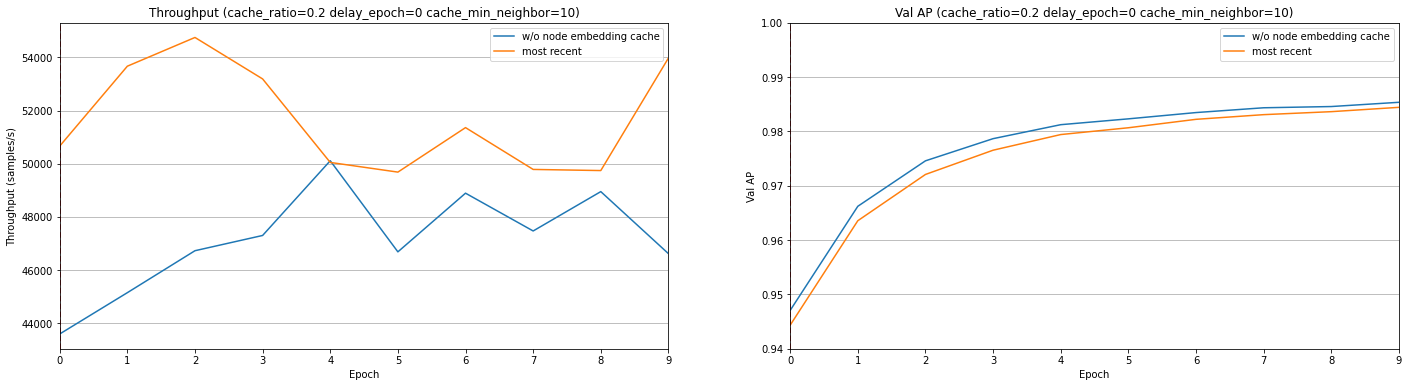

In [19]:
cache_ratio = [0.2]
delay_epoch = [0]
cache_min_neighbor = [10]
param_space = list(itertools.product(cache_ratio, delay_epoch, cache_min_neighbor))

ncols = 2
nrows = 1
fig, axes = plt.subplots(nrows=nrows, ncols=ncols)
fig.set_size_inches(24, nrows * 6)
fig.subplots_adjust(hspace=0.5)

model = 'TGAT'
dataset = 'REDDIT'
i = 0
out_dir = "tmp_res/yczhong_delay_fifo_recent/"

postfix = '||model{}||dataset{}||cache_ratio{}||delay_epoch{}||cache_min_neighbor{}_{}.npy'

no_cache_throughputs = []
no_cache_valss = []

for sampling_type in ["recent", "uniform"]:
    file = out_dir + "throughput" + \
        postfix.format(model, dataset, 0.0, 0, 0, sampling_type)
    no_cache_throughputs.append(np.load(file))
    file = out_dir+"val_ap" + postfix.format(model, dataset, 0.0, 0, 0, sampling_type)
    no_cache_valss.append(np.load(file))

for param in param_space:
    throughput_list = no_cache_throughput
    val_list = no_cache_vals
    for sampling_type in ["recent", "uniform"]:

        file = out_dir+"throughput" + postfix.format(model, dataset,*param, sampling_type)
        throughput = np.load(file)
        file = out_dir+"val_ap" + postfix.format(model, dataset, *param, sampling_type)
        vals = np.load(file)
        node_embedding_hit_rate = np.load(
            out_dir+"node_embed_cache_hit_rate" + postfix.format(model, dataset, *param, sampling_type))
        print(param, node_embedding_hit_rate)
        throughput_list.append(throughput)
        val_list.append(vals)
    labels = ["w/o cache (most recent)", "w/o cache (uniform)", "w/ cache most recent", "w/ cache uniform"]
    plot_throughput(throughput_list,labels, param, axes[0])
    plot_vals(val_list, labels, param, axes[1])
    i += 1
plt.savefig(out_dir+"{}_{}_recent_uniform_result.png".format(model, dataset), dpi=400, bbox_inches='tight')

In [20]:
import torch

/home/yczhong/.conda/envs/jasper/lib/python3.8/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [22]:
x = torch.randn(32)
idx = torch.ones(32).bool()
idx[0] = False
print(x[idx].shape)


torch.Size([31])
